# 1. Applications of Neural Networks


### Text Generation
The [GPT-2](http://jalammar.github.io/illustrated-gpt2/) model is a **decoder** model which uses previous words to predict the next one in a sequence. You can experiment with a limited version of this model at [talk to transformer](https://talktotransformer.com/). 

**Input:** In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.

**Output:** The amazing find was made by researchers of the Universidad Austral de Chile, thanks to one of the country's most highly active amateur scientists. Of course, the creature in question was not a real unicorn, but a llama, and unfortunately the strange creature was killed before researchers could analyze its vocalization.


### Image Recognition
The [VGG-16](https://neurohive.io/en/popular-networks/vgg16/) model is a **deep convolutional** network that can classify image regardless of the scale or rotation of the objects in the image.

doge? | doge?
- | - 
[<img src="img/shibe.jpg" width=240 />](https://knowyourmeme.com/memes/doge) |[<img src="img/doge.jpg" width=240 />](https://en.wikipedia.org/wiki/Doge_of_Venice)


### Image Generation
[Generative adversarial networks](https://neurohive.io/en/news/deepfake-videos-gan-sythesizes-a-video-from-a-single-photo/]) can be used to create plausible images and video.
<img src="img/gan.png" width=600 />

### AI
AlphaZero is a neural network AI that has beaten world champions in [Chess](https://www.chess.com/news/view/updated-alphazero-crushes-stockfish-in-new-1-000-game-match), [Go](https://www.theverge.com/2019/11/27/20985260/ai-go-alphago-lee-se-dol-retired-deepmind-defeat), and [Starcraft](https://www.theverge.com/2019/10/30/20939147/deepmind-google-alphastar-starcraft-2-research-grandmaster-level)

[OpenAI](https://openai.com/blog/solving-rubiks-cube/) has also applied neural networks to solving physical robotics problems.

<img src="img/rubiks.jpg" width=600 />

# 2. Let's build a simple neuron

[<img src="img/feedforward.png" width=200 />](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)


[<img src="img/neuron.jpg" width=400 />](https://medium.com/@jayeshbahire/the-artificial-neural-networks-handbook-part-4-d2087d1f583e)

A neuron is a function that takes a weighted sum of values and applies some transformation. In this case, the values in the weighted sum will be all of the outputs from the previous layer. 

$$y=\varphi\big(\sum_{j=0}^m w_{j}x_j + b\big)$$

Indices:
- $j$ is an index for a neuron in the previous layer
- $m$ is the number of neurons in the previous layer

Variables:
- $y$: the output of our neuron.
- $w_{j}$: the weight connecting $x_j$ in the previous layer and the current neuron
- $x_j$ the output of a neuron in the previous layer.
- $b$ is the 'bias'.

Functions:
- $\varphi$: a transformation that we call an 'activation function'. The simplest would be $\phi(x) = x$, the identity function. 

We will uses the Rectified Linear Unit or [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as our activation function: 

$$    ReLU(x) = \Bigg\{
        \begin{array}{ll}
        x, & \text{if } x > 0\\
        0, & \text{otherwise }\\
        \end{array}
$$

In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

# Create some values to supply to our neuron function
random.seed(1234)
prev_layer_size = 10
prev_layer = random.random(prev_layer_size)
prev_layer = np.append(prev_layer, [1])
weights = random.random(prev_layer_size + 1)
bias = random.uniform()

relu = lambda x: x if x > 0 else 0


# Write this together
def neuron(prev_layer, weights, bias, activation_function):
    '''
    prev_layer: numpy ndarray with shape (m, ) of output values from the previous layer
    weights: numpy ndarray with shape (m, ) of weights connecting previous layer to this neuron
    activation_function: a function which takes a float as an argument and returns a new float
    '''
    weighted_sum = sum(prev_layer * weights) + bias
    return activation_function(weighted_sum)
    
neuron(prev_layer, weights, bias, relu)

4.324881365600903

#### If we treat $\boldsymbol{y}$, $\boldsymbol{w}$, and $\boldsymbol{x}$ as arrays, what are the dimensions of these arrays?

#### If we were to increase weights[0] by 1, how would that affect the output of this function?



# 3. Let's build a network

[<img src="img/feedforward.png" width=200 />](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)

We're going to build a simple neural network with three layers - input, hidden, and output

[<img src="img/weights_matrix.png" width=600 />](https://www.jeremyjordan.me/intro-to-neural-networks/)

In [2]:
np.random.seed(12345)
input_size = 2
hidden_layer_size = 2
output_size = 1

# create random input data
input_layer = random.random(input_size)

# initialize weights and bias for the hidden layer
weights_matrix_input_hidden = random.random(input_size * hidden_layer_size).reshape(input_size, hidden_layer_size) - 0.5
bias_vector_input_hidden = random.random(hidden_layer_size) - 0.5

# initialize weights and bias for the output layer
weights_matrix_hidden_output = random.random(hidden_layer_size * output_size).reshape(hidden_layer_size, output_size) - 0.5
bias_vector_hidden_output = random.random(output_size) - 0.5

# vectorize the activation function so we can apply it across all neurons in a layer
v_relu = np.vectorize(relu)

# write this together
def neuron_layer(prev_layer, weights_matrix, bias_vector, vectorized_activation_function):
    '''
    prev_layer: numpy ndarray with shape (m, ) of the m output values from the previous layer
    weights: numpy ndarray with shape (m, n) of weights connecting previous layer to all n neurons in this layer
    vectorized_activation_function: a vectorized (np.vectorize) function which takes a vector of float as an argument 
        and returns a new vector of floats
    '''
    weighted_sums = np.matmul(prev_layer, weights_matrix) + bias_vector
    return(vectorized_activation_function(weighted_sums))


In [3]:
hidden_layer = neuron_layer(input_layer, weights_matrix_input_hidden, bias_vector_input_hidden, v_relu)
output_layer = neuron_layer(hidden_layer, weights_matrix_hidden_output, bias_vector_hidden_output, v_relu)
print("Inputs in input layer: {}".format(input_layer))
print("Activations from hidden layer: {}".format(hidden_layer))
print("Activations from output layer: {}".format(output_layer))

Inputs in input layer: [0.92961609 0.31637555]
Activations from hidden layer: [0.1921069 0.       ]
Activations from output layer: [0.29553149]


#### What would a unit change in weights_matrix_hidden_output[0,0] do to the output?

#### What would a unit change in weights_matrix_input_hidden[0,0] do to the hidden layer?

#### What would a unit change in weights_matrix_input_hidden[0,0] do to the output layer?



# 4. How good are the predictions?

The output layer gives us a predicted value for our response, given our inputs. We can assess how good this response is using a cost function. One cost function is the squared error:

$$ C(\hat{y}) = (y - \hat{y})^2$$ 


In [4]:
def cost_square_error(yhat, y):
    square_error = (y - yhat)**2
    return(square_error)

yhat = 3.4
y = 3.1


print("C(yhat, y) at yhat = {}: {}".format(yhat, cost_square_error(yhat, y)))



C(yhat, y) at yhat = 3.4: 0.0899999999999999


# 5. How will changing parts of the network affect the cost function?

<img src="img/full_net.png" width=400 />


##### How would a change in $\hat{y}$ affect $C(\hat{y})$?

<img src="img/y_to_C.png" width=200 />


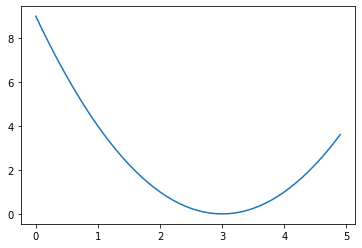

In [5]:
# Plot the shape of the cost function C:
plot_range = np.arange(0, 5, 0.1)
plt.plot(plot_range, [cost_square_error(x, 3) for x in plot_range])



We can see how a change in $\hat{y}$ affects $C(\hat{y})$ by taking the derivative of C with respect to $\hat{y}$:

$$\frac{dC}{d\hat{y}} = -2(y - \hat{y})$$

In [6]:
def derivative_cost_square_error(yhat, y):
    d_sq_error = -2 * (y - yhat)
    return(d_sq_error)

print("dC/dyhat: {}".format(derivative_cost_square_error(yhat, y)))


dC/dyhat: 0.5999999999999996



##### What effect will a change in a weight from hidden layer to output layer have on the output layer?

<img src="img/h_to_y.png" width=200 />

$$    \frac{\partial\hat{y}}{\partial v} = \Bigg\{
        \begin{array}{ll}
        h, & \text{if } vh > 0\\
        0, & \text{otherwise }\\
        \end{array}
$$


In [7]:
def relu_derivative(value):
    if(value > 0):
        return 1
    else:
        return 0
    

def layer_derivative_weight(layer_value, previous_layer_value):
    return relu_derivative(layer_value) * previous_layer_value
    
v_layer_derivative_weights = np.vectorize(layer_derivative_weight, excluded = "previous_layer_value")    
    
print("dyhat / dv: {}".format(v_layer_derivative_weights(output_layer, hidden_layer)))


dyhat / dv: [0.1921069 0.       ]



##### What effect will a change in a hidden layer activation to output layer have on the output layer?

<img src="img/h_to_y.png" width=200 />

$$    \frac{\partial\hat{y}}{\partial h} = \Bigg\{
        \begin{array}{ll}
        v, & \text{if } vh > 0\\
        0, & \text{otherwise }\\
        \end{array}
$$




In [8]:
def layer_derivative_prev_layer(layer_value, weights):
    return relu_derivative(layer_value) * weights

    
v_layer_derivative_prev_layer = np.vectorize(layer_derivative_prev_layer, excluded = "weights")    
    
print("dyhat / dv: \n{}".format(v_layer_derivative_prev_layer(output_layer, weights_matrix_hidden_output)))

dyhat / dv: 
[[0.24890664]
 [0.15356987]]


##### What effect will a change in a weight from hidden layer to output layer have on the cost function?

<img src="img/h_to_C.png" width=400 />

$$\frac{\partial C}{\partial v} = \frac{\partial C}{\partial \hat{y}} \frac{\partial\hat{y}}{\partial v}$$

In [9]:
derivative_cost_square_error(yhat, y) * v_layer_derivative_weights(output_layer, hidden_layer)

array([0.11526414, 0.        ])

##### What effect will a change in a hidden layer activation have on the cost function?

<img src="img/h_to_C.png" width=400 />

$$\frac{\partial C}{\partial h} = \frac{\partial C}{\partial \hat{y}} \frac{\partial\hat{y}}{\partial h}$$

In [10]:
derivative_cost_square_error(yhat, y) * v_layer_derivative_prev_layer(output_layer, weights_matrix_hidden_output)

array([[0.14934398],
       [0.09214192]])

##### What effect will a change in a weight from input layer to hidden layer have on the hidden layer?
<img src="img/x_to_h.png" width=200 />

$$    \frac{\partial h}{\partial w} = \Bigg\{
        \begin{array}{ll}
        x, & \text{if } wx > 0\\
        0, & \text{otherwise }\\
        \end{array}
$$


In [11]:
v_layer_derivative_weights(hidden_layer, input_layer)

array([0.92961609, 0.        ])

##### What effect will a change in a weight from input layer to hidden layer have on the output layer?
<img src="img/x_to_y.png" width=400 />

$$    \frac{\partial\hat{y}}{\partial w} = \frac{\partial \hat{y}}{\partial h} \frac{\partial h}{\partial w}
$$


In [12]:
 v_layer_derivative_prev_layer(output_layer, weights_matrix_hidden_output) * v_layer_derivative_weights(hidden_layer, input_layer) 

array([[0.23138762, 0.        ],
       [0.14276102, 0.        ]])

##### What effect will a change in a weight from input layer to hidden layer have on the cost function?

<img src="img/full_net.png" width=600 />

$$    \frac{\partial C}{\partial w} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h} \frac{\partial h}{\partial w}
$$

Note that we already calculated $\frac{\partial C}{\partial h} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h}$ above!

$$    \frac{\partial C}{\partial w} = \frac{\partial C}{\partial h} \frac{\partial h}{\partial w} $$

In [13]:
derivative_cost_square_error(yhat, y) * v_layer_derivative_prev_layer(output_layer, weights_matrix_hidden_output) * v_layer_derivative_weights(hidden_layer, input_layer) 

array([[0.13883257, 0.        ],
       [0.08565661, 0.        ]])

# 6. Using Gradient Descent to Improve the Prediction

We'd like to make the cost function C smaller. Since we now know how small changes in each weight will effect C, we can iteratively make those changes to minimize C. 

# 7. Doing this the easy way

Just use Keras!

In [14]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(2, input_dim=2)) # add a hidden layer of size 2, connected to the input layer of size 2
model.add(Activation('relu')) # use relu activation
model.add(Dense(1)) # add the output layer of size 1, connected to the hidden layer
model.add(Activation('relu')) # use relu activation

# compile the model using a cost function of mean squared error and stochastic gradient descent
model.compile(optimizer='sgd',  loss='mse') 


Using TensorFlow backend.


In [15]:
X = random.random(300).reshape(-1, 2) - 0.5
y = 0.4 * X[:,0] + 2.1 * X[:,1]
model.fit(X, y)

Epoch 1/1
150/150 [==============================] - 1s 7ms/step - loss: 0.3932


In [16]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.06074749, 1.0395617 ],
        [0.7802988 , 0.10785796]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00710098, -0.00198013], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.72229207],
        [ 0.7540542 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00667288], dtype=float32)>]